# Data exploration

In data case I have a dataset of normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 183 pancreatic cancer tumors. The file format is GCT , It is a tab-delimited file used for sharing details for each sample<br>

Here I have imported all the required library

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cmapPy.pandasGEXpress.parse import parse
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import Axes3D

from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE

In [50]:
data = parse("PAAD.gct")
print(type(data))

<class 'cmapPy.pandasGEXpress.GCToo.GCToo'>


Here i have parsed our dataset into GCToo pandas dataframe instance which contains 3 component dataframes.<br>
(row_metadata_df, column_metadata_df, and data_df).

In [51]:
# Read all portion of data
col_data = data.col_metadata_df #columns data
row_data = data.row_metadata_df #row data
new_data = data.data_df

In [52]:
#Gatting data shape before droping constant value's columns
col_data.shape

(183, 124)

Total 86 columns have missing value, and Total 9659 missing values in dataset


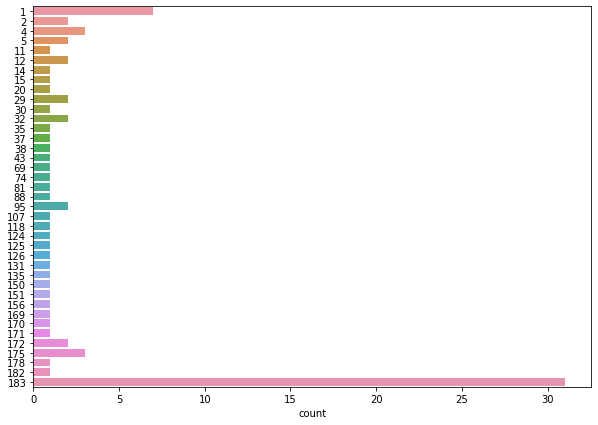

In [53]:
# Make a countplot of Number of missing values in each column of col_data
missing_val_count_by_column = (col_data.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {col_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_val_count_by_col, y= missing_val_count_by_col )

Exploring each columns of column data and get unique values in each columns or features, and drop all the columns which has constant or only one unique value.

In [54]:
# Explore each columns of col_data
for col in col_data.columns:
    print(f"{col}:   {len(col_data[col].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
additional_studies:   1 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
b_symptoms:   1 unique values:
bcr:   1 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:

In [55]:
# drop columns which have constant value
for col in col_data.columns:
    if len(col_data[col].unique())<2:
        col_data.drop(columns=col, inplace=True)

In [56]:
#Gatting data shape after droping constant value's columns. 
col_data.shape

(183, 83)

In [57]:
#checking column data after droping constant value's columns.
for col in col_data.columns:
    print(f"{col}:   {len(col_data[col].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:
bcr_patient_canonical_status:   2 unique values:
day_of_form_completion:   30 unique values:


**Some Behaviour of patient in Columns data(col_data).**

* **sample_type** is our **target variable** which tells that which patient have cancer tumor or not.

* **participant_id** unique value for each patient.

* **mRNAseq_cluster**  estimates of the levels of individual isoforms within the cell of RNA sequence.

* **bcr_patient_barcode** and **bcr_patient_uuid** representing the metadata of the participants and their samples.

* **vital_status** Current status of patient(live/death). (may pose data leakage)

* **adenocarcinoma_invasion** Tells about cancer grows and spreads to near cell or not.

* **maximum_tumor_dimension** Size of Tumor, tumor size is strongly related to chances for survival.

* **pathologic_stage** Stage of cancer (amount or spread of cancer in the body)

**Graphical Repersentation of Some column(Patient behaviour).**


In [58]:
# for adenocarcinoma_invasion column
col_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

No handles with labels found to put in legend.


RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


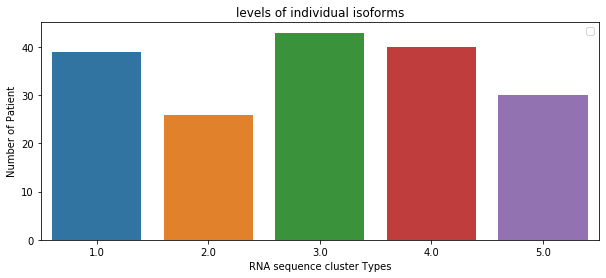

In [59]:
# mRNAsequence cluster according number of patient
conts_mRNA = col_data.mRNAseq_cluster.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=conts_mRNA.index,y=conts_mRNA.values,)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('levels of individual isoforms')
plt.legend()
for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

Text(0.5, 1.0, 'Vital status of patient by mRNA sequence cluster types ')

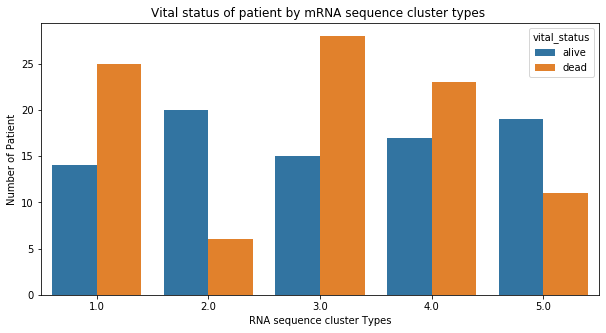

In [60]:
#plot of vital_status of patient by mRNAseq_cluster.
mRNA_seq_group = col_data.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='mRNAseq_cluster', y='counts', hue='vital_status', data=mRNA_seq_group)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('Vital status of patient by mRNA sequence cluster types ')

In [61]:
#mRNAsequence cluster of patient on dead or alive time
for cluster_type in mRNA_seq_group.mRNAseq_cluster.unique():
    data = mRNA_seq_group[mRNA_seq_group.mRNAseq_cluster==cluster_type]
    live_pcn = round((data[data['vital_status']=='alive']['counts']
                      /sum(data.counts.values))*100, 2)
    dead_pcn = round((data[data['vital_status']=='dead']['counts']/
                     sum(data.counts.values))*100, 2)
    print(f"mRNAseq_cluster type {cluster_type} patient dead {dead_pcn.values[0]}% times")
    print(f"mRNAseq_cluster type {cluster_type} patient alive {live_pcn.values[0]}% times")
    print("\n")

mRNAseq_cluster type 1.0 patient dead 64.1% times
mRNAseq_cluster type 1.0 patient alive 35.9% times


mRNAseq_cluster type 2.0 patient dead 23.08% times
mRNAseq_cluster type 2.0 patient alive 76.92% times


mRNAseq_cluster type 3.0 patient dead 65.12% times
mRNAseq_cluster type 3.0 patient alive 34.88% times


mRNAseq_cluster type 4.0 patient dead 57.5% times
mRNAseq_cluster type 4.0 patient alive 42.5% times


mRNAseq_cluster type 5.0 patient dead 36.67% times
mRNAseq_cluster type 5.0 patient alive 63.33% times




There is 65% of time patient are dead if mRNAseq_cluster type is 1 and 3.
mRNAseq_cluster 1, 3, 4 are risky types then 2, 5 

In [62]:
#for sample type or target variable
col_data.sample_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: sample_type, dtype: int64

Text(0.5, 1.0, 'Vital status vs cancer type ')

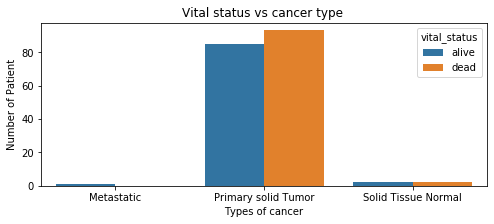

In [63]:
#ploting of sample type according vital status of patient is alive or dead
sample_type_group = col_data.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(8, 3))
sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group)
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

Types of tumer not play role in current vital status of patient. There is 50-50 chance of patient are currently alive or dead

Approx every patient cancer grows and spreads into body cells.

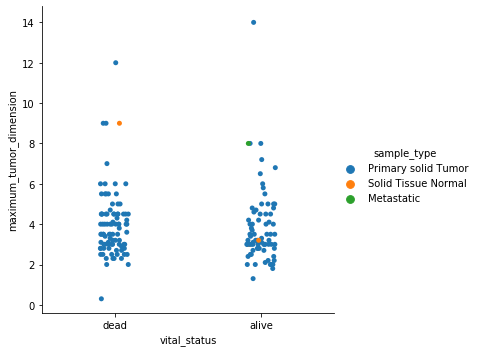

In [64]:
#catplot of sample type
#It is visual representations to show the relationship between multiple variables in a dataset.
sns.catplot(x='vital_status', y='maximum_tumor_dimension', hue='sample_type', data=col_data)

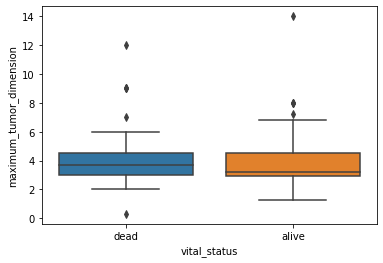

In [65]:
#Draw a box plot to show distributions with respect to categories(dead and alive) of vital status.
#A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates 
#comparisons between variables or across levels of a categorical variable.
sns.boxplot(x='vital_status', y='maximum_tumor_dimension', data=col_data)

on average which has higher tumor dimension are most likely to dead.

In [66]:
# for pathalogic stage column
col_data.pathologic_stage.value_counts()

stage iib    122
stage iia     29
stage ib      15
stage iv       5
stage ia       5
stage iii      4
stage i        1
Name: pathologic_stage, dtype: int64

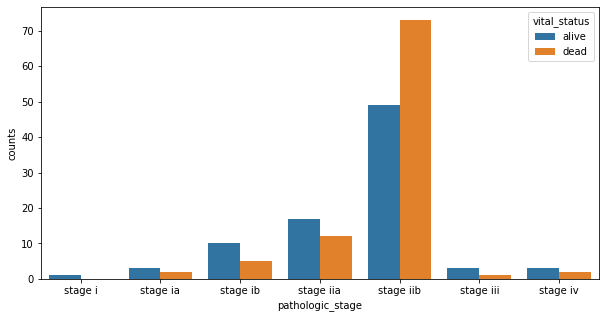

In [67]:
#ploting the pathologic stage according vital status of patient
pathologic_stage_group = col_data.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group)

**pathologic stages follow:**
* **stage 0:** Abnormal cells are present but have not spread to nearby tissue.Data set have not this stage because approx all adenocarcinoma_invasion value is True.
* **stage i**, **stage ii**,**stage iii** Cancer is present. The higher the number, the larger the cancer tumor and the more it has spread into nearby tissues.
* **stage iv** The cancer has spread to distant parts of the body.

* **The T refers** to the size and extent of the main tumor. The main tumor is usually called the primary tumor.
* **The N refers** to the the number of nearby lymph nodes that have cancer.
* **The M refers** to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body.
* majority of patient have **pathologic_t3** and **pathologic_n1** types stages.

In [68]:
print(row_data.index[:5])
print(row_data.shape)
row_data.head()

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1'], dtype='object', name='rid')
(18465, 0)


rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


In [69]:
new_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


Total 183 columns have missing value, and Total 134954 missing values in dataset


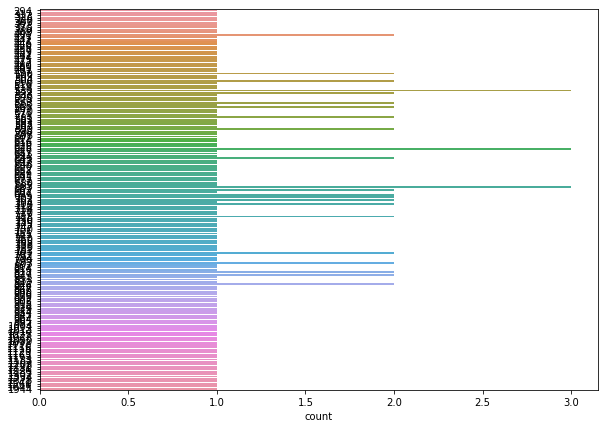

In [70]:
# Number of missing values in each column of data
missing_val_count_by_column = (new_data.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {new_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_val_count_by_col, y= missing_val_count_by_col )

In [71]:
new_imputer = SimpleImputer()
imputed_new_data = pd.DataFrame(new_imputer.fit_transform(new_data))
imputed_new_data.columns = new_data.columns
imputed_new_data.index = new_data.index

imputed_new_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.200000,8.000000,7.65,8.100000,8.200000,8.2,7.55,8.450000,...,8.45,7.95,8.3,8.050000,8.2,7.25,7.4,7.350000,7.2,9.050000
A1BG,6.40,5.8,6.400000,5.800000,6.70,6.600000,6.300000,6.5,5.70,6.300000,...,7.10,7.10,6.7,7.000000,6.9,7.10,7.3,7.900000,6.0,6.900000
A1CF,4.70,5.7,3.000000,5.100000,4.40,4.200000,1.600000,6.8,6.00,7.431307,...,5.40,6.40,6.5,4.400000,3.3,3.60,6.2,1.200000,4.9,2.000000
A2BP1,-1.00,1.1,7.577068,7.728812,0.10,7.664173,7.628676,1.7,0.40,-1.500000,...,3.50,1.30,-0.3,7.685606,2.1,2.00,0.0,7.540936,2.0,7.660114
A2LD1,7.50,6.8,7.300000,7.500000,7.40,6.600000,7.100000,6.8,8.00,5.800000,...,6.50,7.30,6.1,6.700000,6.5,6.70,6.7,6.500000,6.9,6.700000


In [72]:
print(len(new_data.columns.unique()))
print(len(col_data.index.unique()))

183
183


In [73]:
col_to_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage',]
participant_id = col_data.participant_id
target_variable = col_data.sample_type
col_data = col_data.set_index('participant_id')
imputed_new_data = imputed_new_data.rename(columns=participant_id).T
imputed_new_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,...,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,...,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,...,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,...,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,...,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9


In [74]:
for col in col_to_merge:
    imputed_new_data[col] = col_data[col]
imputed_new_data.head(2)

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZYX,ZZEF1,ZZZ3,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage
cid,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.0,7.5,6.400000,14.3,10.6,8.8,1.0,...,12.9,10.1,9.3,5.5,Primary solid Tumor,1.0,yes,dead,4.5,stage iib
aab4,8.10,5.8,5.7,1.1,6.8,7.639954,14.0,10.2,5.6,-1.2,...,12.4,9.8,8.9,4.5,Primary solid Tumor,2.0,yes,alive,6.8,stage iib


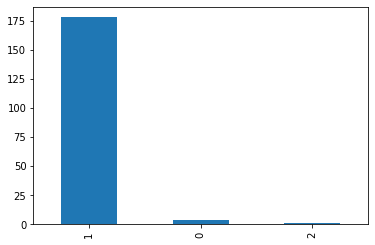

In [75]:
def cat_to_numeric(x):
    if x=='Solid Tissue Normal':
        return 0
    elif x=='Primary solid Tumor':
        return 1
    else:
        return 2
target_variable = target_variable.map(lambda x: cat_to_numeric(x))
target_variable.value_counts().plot(kind='bar')

In [76]:
def remove_nulls(df):

    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            df[[col]] = df[[col]].apply(lambda x: x.fillna(method='backfill'))
            print(f"The column {col} has removed {null_values_rows} null values")
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    return df

new_data = remove_nulls(imputed_new_data.select_dtypes(exclude='object'))

The column mRNAseq_cluster has 5 null values. It is 2.73% of total rows.
The column mRNAseq_cluster is of type float64.

The column mRNAseq_cluster has removed 5 null values
The column maximum_tumor_dimension has 14 null values. It is 7.65% of total rows.
The column maximum_tumor_dimension is of type float64.

The column maximum_tumor_dimension has removed 14 null values
The DataFrame has 2 columns with null values. It is 0.01% of total columns.


/home/omraj/.local/lib/python3.6/site-packages/pandas/core/frame.py:2960: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [78]:
X_std = StandardScaler().fit_transform(imputed_new_data.drop(columns=col_to_merge))

n_components = 100
sklearn_pca = sklearnPCA(n_components=n_components)
Y_sklearn = sklearn_pca.fit_transform(X_std)

### What can be said about the variance of the PCA?

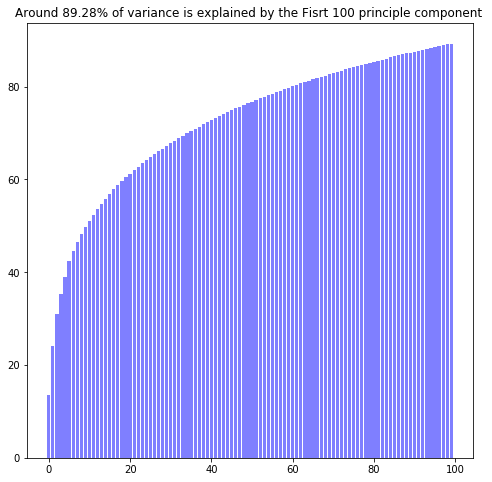

In [79]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

explained_var = round(sklearn_pca.explained_variance_ratio_.sum()*100, 2)

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(n_components), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title(f"Around {explained_var}% of variance is explained by the Fisrt {n_components} principle component ");

### Visualize the data whole data using PCA.

[]

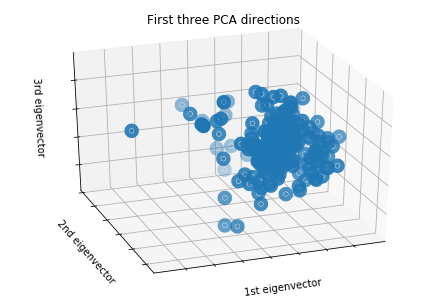

In [80]:
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=target_variable
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

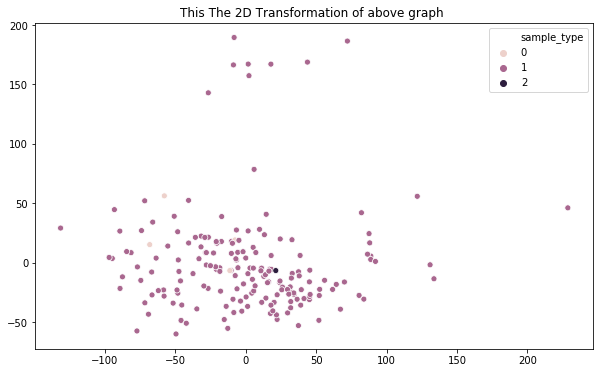

In [81]:
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=Y)
plt.title("This The 2D Transformation of above graph ")

the neuroendocrine tumors clearly not separable from the adenocarcinoma tumors?

# 2
hear Remove the neuroendocrine tumors from the dataset so that it contains only the adenocarcinoma tumor samples. The histology for the different tumor samples is contained in the new_data.

In [47]:
imputed_new_data = imputed_new_data[imputed_new_data['adenocarcinoma_invasion']=='yes']
imputed_new_data.shape

(182, 18474)

**Interferons (IFNs)** are a group of signaling proteins made and released by host cells in response to the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and consists a set of 25 genes in homo sapiens.


In [82]:
#read these 25 IFN signature
ifn_sig = pd.read_csv('type1_IFN.txt', header=None)
ifn_sig.columns = ['member']
ifn_sig.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [83]:
ifn_sig_data = imputed_new_data[ifn_sig['member'].to_list()]
ifn_sig_data.shape

(183, 25)

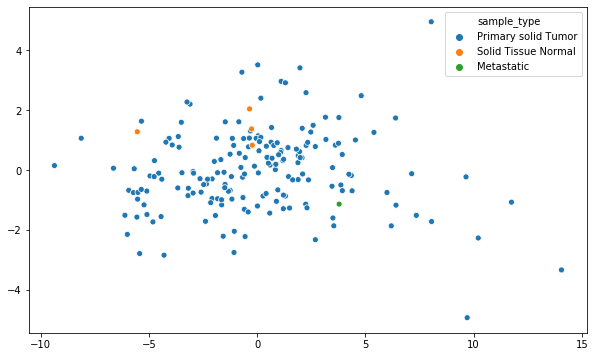

In [84]:
X_std = StandardScaler().fit_transform(ifn_sig_data)
n_components = 2
sklearn_pca = sklearnPCA(n_components=n_components)
X_reduced  = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_new_data['sample_type'])


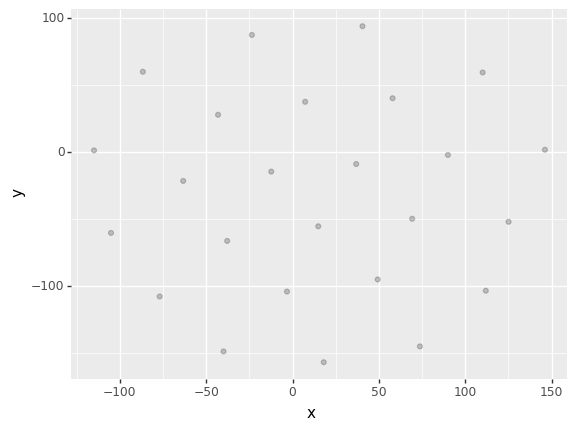

<ggplot: (8727826193840)>

In [51]:
XV = TSNE(n_components=2).\
    fit_transform(ifn_sig_data.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)